### A Verbose Tutorial: Local Natural Language Processing Linear Descriminant Analysis (or Principle Component Analsys) from NPLIA or "NLP In Action" (by Hobbson Lane), using podman and offical TensorFlow Container with Jupyter Notebook

## For Podman tensorflow env:

Assuming podman is installed:
https://podman.io/getting-started/installation

Run in terminal to create your containerized tensorflow friendly python environmnet complete with jyputer. 

```
$ podman pull tensorflow/tensorflow:latest 
$ podman run -it -p 8888:8888 tensorflow/tensorflow:latest-jupyter
```
Note: If prompted, selecting the docker tensorflow package may work.

In [1]:
# Upgrade pip
!python -m pip install --upgrade pip

In [2]:
"""
For Full NLPIA
"""

# Install NLPIA
# !python -m pip install nlpia

'\nFor Full NLPIA\n'

In [3]:
# import your python libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
from pugnlp.stats import Confusion

/usr/local/lib/python3.8/dist-packages/pugnlp/constants.py:136: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  [datetime.datetime, pd.datetime, pd.Timestamp])
/usr/local/lib/python3.8/dist-packages/pugnlp/constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
/usr/local/lib/python3.8/dist-packages/pugnlp/tutil.py:100: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  np = pd.np
/usr/local/lib/python3.8/dist-packages/pugnlp/util.py:80: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  np = pd.np
/usr/local/lib/python3.8/dist-packages/pug

In [4]:
# set display
pd.options.display.width = 120

In [5]:
# get training data
from nlpia.data.loaders import get_data

/usr/local/lib/python3.8/dist-packages/nlpia/futil.py:30: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  np = pd.np
/usr/local/lib/python3.8/dist-packages/nlpia/loaders.py:78: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  np = pd.np


In [6]:
sms = get_data('sms-spam')

In [7]:
"""
For Minimal

Data set:
    - From here: https://archive.ics.uci.edu/ml/datasets/sms+spam+collection
    - https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

use: !python -m pip install scikit-learn pandas nltk

"""

'\nFor Minimal\n\nData set:\n    - From here: https://archive.ics.uci.edu/ml/datasets/sms+spam+collection\n    - https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip\n\nuse: !python -m pip install scikit-learn pandas nltk\n\n'

In [8]:
# What kind of object is 'sms' as it comes directly from NLPIA materials?
type(sms)

pandas.core.frame.DataFrame

In [9]:
# inspect
sms

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
4832,1,This is the 2nd time we have tried 2 contact u...
4833,0,Will ü b going to esplanade fr home?
4834,0,"Pity, * was in mood for that. So...any other s..."
4835,0,The guy did some bitching but I acted like i'd...


In [10]:
# fod display: flag spam messages with '!' a bang label
index = ['sms{}{}'.format(i, '!'*j) for (i,j) in\
        zip(range(len(sms)), sms.spam)]

In [11]:
# make your custom-indexed version of the sms dataframe
sms = pd.DataFrame(sms.values, columns=sms.columns, index=index)

In [12]:
sms

,spam,text
sms0,0,"Go until jurong point, crazy.. Available only ..."
sms1,0,Ok lar... Joking wif u oni...
sms2!,1,Free entry in 2 a wkly comp to win FA Cup fina...
sms3,0,U dun say so early hor... U c already then say...
sms4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
sms4832!,1,This is the 2nd time we have tried 2 contact u...
sms4833,0,Will ü b going to esplanade fr home?
sms4834,0,"Pity, * was in mood for that. So...any other s..."
sms4835,0,The guy did some bitching but I acted like i'd...


In [13]:
"""
The 'spam' column of the 'sms' dataframe should be an integer (1 or 0),
that indicates the class of the message (the label of the dataset):
1 -> spam
0 -> ham (not-spam)

For good measure:
Force type of 'spam' column to be int
"""
sms['spam'] = sms.spam.astype(int)

In [14]:
# get length of dataset...length of a dataframe??
len(sms)

4837

In [15]:
# shape of dataset (more normal way to do it....maybe)
sms.shape

(4837, 2)

In [16]:
"""
Q: What portion of the training data is spam?
A: Add up the binary numbers saying what it is?
"""

sms.spam.sum()

638

In [17]:
# Tokenize your language data:
tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize)

In [18]:
type(tfidf_model)

sklearn.feature_extraction.text.TfidfVectorizer

In [19]:
tfidf_docs = tfidf_model.fit_transform( raw_documents=sms.text ).toarray()

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
type(tfidf_docs)

numpy.ndarray

In [21]:
# now let's look at the shape of the array of tokens:
tfidf_docs.shape

(4837, 9232)

In [22]:
tfidf_docs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
"""
LDA -> Linear Descriminant Analysis:
- find the vector-space centroid of your two classes:
1. spam
2. ham (not_spam)
"""

'\nLDA -> Linear Descriminant Analysis:\n- find the vector-space centroid of your two classes:\n1. spam\n2. ham (not_spam)\n'

# Mask = Rows (spam / ham, True / False)

# Spam Centroids = Columns (mean spam values for all columns)


# Ham Centroids = Columns (mean ham values for all columns)

Q: How many centroids are there? 
A: Same as the number of Columns

In [24]:
mask = sms.spam.astype(bool).values

In [25]:
# rows taht are spam (True or False)
mask.shape

(4837,)

In [26]:
mask

array([False, False,  True, ..., False, False, False])

In [27]:
spam_centroid = tfidf_docs[mask].mean(axis=0)

In [28]:
# ~ in pandas inverses a boolean [mask] value
ham_centroid = tfidf_docs[~mask].mean(axis=0)

In [29]:
# inspection
spam_centroid

array([0.06377591, 0.0041675 , 0.00056204, ..., 0.        , 0.        ,
       0.        ])

In [30]:
# view as two-decimals
spam_centroid.round(2)

array([0.06, 0.  , 0.  , ..., 0.  , 0.  , 0.  ])

In [31]:
# view as two-decimals
ham_centroid.round(2)

array([0.02, 0.01, 0.  , ..., 0.  , 0.  , 0.  ])

In [32]:
spam_centroid.shape

(9232,)

In [33]:
ham_centroid.shape

(9232,)

# Find The Line
#### (Linear Descriminant Analaysis)

### Overview:
If this is a linear model, then we will be able to draw a line that separates the two classes. (Hotdog, not_hotdog)

Now that we have calculated centroids for the vector regions of the two classification-classes we are trying to distinguish from one-another:

Simply subtraction one centroid from the other should give us the 'line' or linear model separating the two classes:

To get the line between the spam-centroids and the ham-centroids we use the dot-product of spam-centroids minus not-spam centroids (or ham centroids). 

In [34]:
spam_score = tfidf_docs.dot(spam_centroid - ham_centroid)

## How many scores are there? 
#### As matrix dot products work, there are as many scores as there are rows (or sentences), so one score (prediction) for each sentence. 

In [35]:
spam_score.shape

(4837,)

In [36]:
spam_score

array([-0.01469806, -0.02007376,  0.03856095, ..., -0.01014774,
       -0.00344281,  0.00395752])

In [37]:
spam_score.round(2)

array([-0.01, -0.02,  0.04, ..., -0.01, -0.  ,  0.  ])

In [38]:
# train a model on your centroids

from sklearn.preprocessing import MinMaxScaler

In [39]:
sms['lda_score'] = MinMaxScaler().fit_transform(spam_score.reshape(-1,1))

In [40]:
sms['lda_predict'] = (sms.lda_score > .5).astype(int)

### Predict and Score just the first 6:

In [41]:
sms['spam lda_predict lda_score'.split()].round(2).head(6)

,spam,lda_predict,lda_score
sms0,0,0,0.23
sms1,0,0,0.18
sms2!,1,1,0.72
sms3,0,0,0.18
sms4,0,0,0.29
sms5!,1,1,0.55


## Predict and Score (all examples)

#### Let's look at the overall 'accuracy' of all our precitions...How did we do?

In [42]:
print( "Percent correct-predictions:",
(1. - (sms.spam - sms.lda_predict).abs().sum() / len(sms)).round(3)*100,"%" )

Percent correct-predictions: 97.7 %


# Confusion Matrix
Always good to look at the confusion matrix!
See where you got false negatives, false positives, etc.

In [43]:
# requires: from pugnlp.stats import Confusion
Confusion(sms['spam lda_predict'.split()])

/usr/local/lib/python3.8/dist-packages/pugnlp/stats.py:504: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.__setattr__('_hist_labels', self.sum().astype(int))
/usr/local/lib/python3.8/dist-packages/pugnlp/stats.py:510: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  setattr(self, '_hist_classes', self.T.sum())
/usr/local/lib/python3.8/dist-packages/pugnlp/stats.py:513: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  setattr(self, '_tp', self.get(self._pos_label, pd.Series()).get(self._pos_label, 0))
/usr/local/lib/python3.8/dist-packages/pugnlp/stats.py:517: FutureWarning: The default dtype for empty Series will be 'object' instead of 'f

lda_predict,0,1
spam,,
0,4135,64
1,45,593


### Attempted Data Visualization

In [65]:
spam_centroid.shape[0]

9232

In [55]:
cloud_x = spam_centroid

cloud_y = ham_centroid

# cloud_1 = np.concatenate((cloud_x, cloud_y), axis=1)
cloud_1 = np.column_stack([cloud_x, cloud_y])

cloud_1.shape

(9232, 2)

In [58]:
cloud_1

array([[6.37759139e-02, 1.98493115e-02],
       [4.16749681e-03, 6.09435187e-03],
       [5.62035011e-04, 1.77747817e-04],
       ...,
       [0.00000000e+00, 6.31869803e-05],
       [0.00000000e+00, 6.31869803e-05],
       [0.00000000e+00, 6.31869803e-05]])

In [56]:
# https://towardsdatascience.com/discover-3d-point-cloud-processing-with-python-6112d9ee38e7
    
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [57]:
from sklearn.decomposition import PCA

In [50]:
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

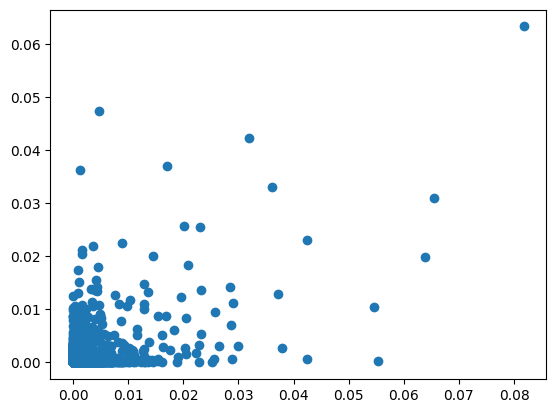

In [52]:
plt.scatter(spam_centroid, ham_centroid)
plt.show()

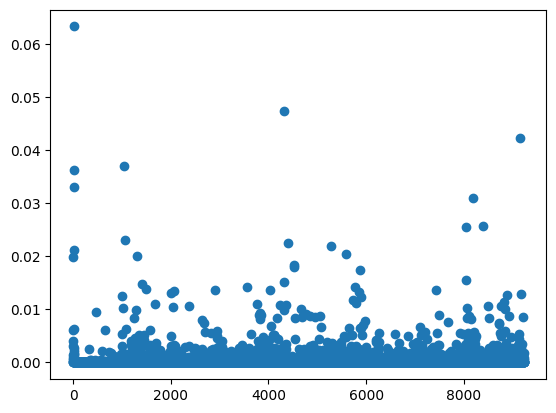

In [68]:
x = np.arange(0, ham_centroid.shape[0])
plt.scatter(x, ham_centroid)
plt.show()

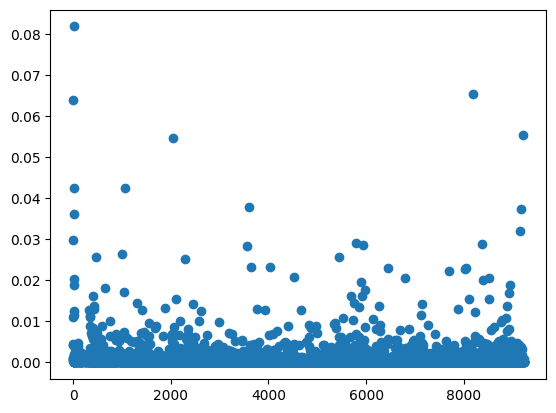

In [69]:
x = np.arange(0, spam_centroid.shape[0])
plt.scatter(x, spam_centroid)
plt.show()

Notes:

- https://www.globaltechcouncil.org/machine-learning/principal-component-analysis-vs-linear-discriminant-analysis/
